<a href="https://colab.research.google.com/github/MonitSharma/Computational-Methods-in-Physics/blob/main/Lecture12_Intro_to_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Machine Learning

Machine learning comes in many forms. However, at its core, machine learning techniques as it is used today is not functionally different than the data analysis we have been doing. The basic idea is the same: I am trying to "learn" how to predict something or do something (make a good model) give past experience (data).

---------

The key difference between scientific data analysis and generic machine learning algorithms is that the goal is not to produce a measurement of a physical parameter with well understood error bars: it is to strategy for making decisions that is "good enough" for the application you have in mind. However, this isn't always true and machine learning is increasingly employed in scientific domains where the goals are the same.

---------

For the purpose of this class, we will only talk about some fairly basic models of supervised learning. Roughly speaking, this means we have a data set that we will train our model on where we know the true answers.

To make this concrete, we are going to use the IRIS data set from scikitlearn.

In [2]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [3]:
X, y = load_iris(return_X_y=True)

Here $X$ is some measurments of the length of the pedals of the iris flower that we are given and we are trying to predict y, one of 3 types of species of iris plants

In [4]:
print(X[0:3])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


So our goal is to make a function $f(X) \to y$ . We are going to use part of our data to train out model and then the rest to test how it did. This is important because we have good reason to worry about overfitting, so we want to test how well it predicts the result when you don't have the luxuary of knowing the result already.

-------

Here we will make a training set by using every 5th entry:

In [5]:
Xtrain=X[::5,:]
ytrain=y[::5]

Most basic algorithms are designed to minimize some kind of "cost function" (or kernel). The idea is that when you have a good model, this cost function (whatever it is) will be small.

We will start by using a method that will look quite familiar. We will choose the kernel RBF defined by


$$ k\left(x_{i}, x_{j}\right)=\exp \left(-\frac{d\left(x_{i}, x_{j}\right)^{2}}{2 l^{2}}\right) $$

where $d$ is the distance between the two results

In [6]:
kernel = 1.0 * RBF(1.0)

This method will assign a probability for each of the possible iris types $(y)$ given the eye measurements $X$ . We can guess that this means there is some $x'(y)$
 for each $y$ value so that  $P(y|X)= k(X,x'(y))$
 and the computer is trying to the $x'(y)$
 that maximize the posterior. We can now fit this model as follows:

In [7]:
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(Xtrain, ytrain)
gpc.score(Xtrain, ytrain)

1.0

Now we can see how we did:

In [8]:
out=gpc.predict_proba(X)

Text(0.5, 1.0, 'Prediction')

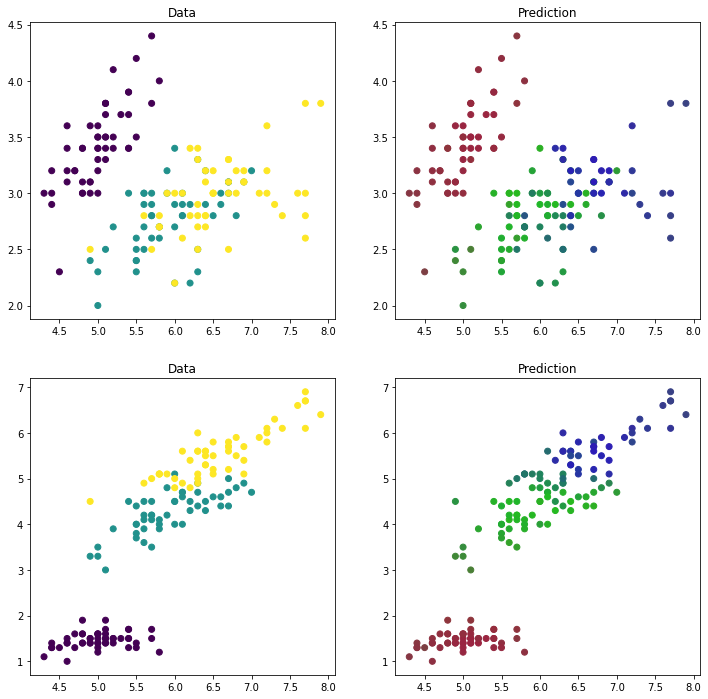

In [9]:
fig,ax=plt.subplots(figsize=(12,12),ncols=2,nrows=2)
ax[0,0].scatter(X[:,0],X[:,1],c=y)
ax[0,0].set_title('Data')
ax[0,1].scatter(X[:,0],X[:,1],c=out)
ax[0,1].set_title('Prediction')
ax[1,0].scatter(X[:,0],X[:,2],c=y)
ax[1,0].set_title('Data')
ax[1,1].scatter(X[:,0],X[:,2],c=out)
ax[1,1].set_title('Prediction')

In [10]:
gpc.score(X, y) 

0.9133333333333333

Now we can try again with another function to extremize. Here we will use decision trees. This is a model designed for classifying where essentially the data is split according to simple rules (roughly if X then y). The rules are changed to optimize the predictions on the training set:

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier(random_state=0)

In [13]:
clf_fit=clf.fit(Xtrain, ytrain)

In [16]:
clf_out=clf_fit.predict_proba(X)

In [17]:
clf_fit.score(X, y) 

0.9466666666666667

Text(0.5, 1.0, 'Prediction')

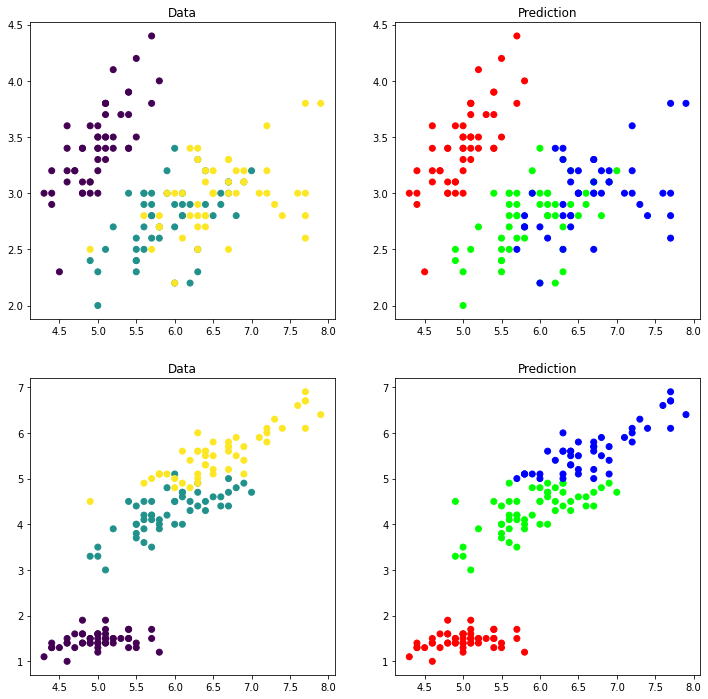

In [18]:
fig,ax=plt.subplots(figsize=(12,12),ncols=2,nrows=2)
ax[0,0].scatter(X[:,0],X[:,1],c=y)
ax[0,0].set_title('Data')
ax[0,1].scatter(X[:,0],X[:,1],c=clf_out)
ax[0,1].set_title('Prediction')
ax[1,0].scatter(X[:,0],X[:,2],c=y)
ax[1,0].set_title('Data')
ax[1,1].scatter(X[:,0],X[:,2],c=clf_out)
ax[1,1].set_title('Prediction')

## Using All the Classifiers on the IRIS dataset

In [19]:
%pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [21]:
data = load_iris()
X = data.data
y = data.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5, random_state=123)

In [24]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predicitons = clf.fit(X_train,X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 43.30it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.99               0.99    None      0.99   
AdaBoostClassifier                 0.97               0.98    None      0.97   
LogisticRegression                 0.97               0.98    None      0.97   
GaussianNB                         0.97               0.98    None      0.97   
PassiveAggressiveClassifier        0.97               0.98    None      0.97   
SGDClassifier                      0.96               0.96    None      0.96   
RandomForestClassifier             0.96               0.96    None      0.96   
ExtraTreeClassifier                0.96               0.96    None      0.96   
QuadraticDiscriminantAnalysis      0.96               0.96    None      0.96   
Perceptron                         0.96               0.96    None      0.96   
XGBClassifier                      0.95 

## Take Aways


At a very surface level there is essentially no difference betweew "machine learning" and our data analysis techniques. Both are attempts to give the best possible model of a data set by finding extremes of a given function.


------


However, if we think back on our experience solving equations or finding minima / maximima, we recall that the computer could easily get into trouble. Finding minimima is not always easy, especially if you don't have a good starting place. While all of the focus may sound like it is the choice of the function we are minimizing, the reality is that the real challenge is finding the minimum. As an illustration - suppose I want my ML algorithm to find a solution to a differential equation. I.e. we want to find the function $x(t)$ that satisfies


$$ \ddot x(t)+\omega_0^2 x(t) =0 $$

------


If is very easily to define this as a minimization problem: find $x(t)$  so that we minimize

$$ (\ddot x(t)+\omega_0^2 x(t))^2 $$

------

However, $x(t)$ is a function, so finding its value at every point in $t \in (0, 100)$ requires minimizing over a very large number of parameters (100s or 1000s depending on how finely we need to know $x(t)$ ). In this precise sense, ML / AI is often a name for a rapid method to minimize functions to a given approximation.
